# The Tampa Bay Times and school performance

**Story:** [The story](http://www.tampabay.com/projects/2015/investigations/pinellas-failure-factories/), and [a critique](https://rogueedu.blogspot.com/2015/08/fcat-reading-scores-only-two-of-five.html)

**Author:** A million people, but I believe Nathaniel Lash did the data analysis

**Topics:** Linear Regression, Residuals

**Datasets**

* **0066897-gr04_rsch_2014.xls:** 4th grader pass rates for standardized tests, from Florida Dept of Education
* **FRL-1314-School-Web-Survey-3-Final.xls:** Free and reduced price lunch data, from Florida Dept of Education
* **MembershipSchoolRaceGender1415.xls:** School population by gender, from Florida Dept of Education

# What's the story?

We're trying to see what kind of effect race and poverty have on school test score data. Their actual story doesn't include a regression, but they used one behind the scenes for research.

<p class="reading-options">
  <a class="btn" href="/tampa-bay-times-schools/linear-regression-on-florida-schools-no-cleaning-completed">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/tampa-bay-times-schools/notebooks/Linear regression on Florida schools (No cleaning) (Completed).ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="#">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **data-cleaned-merged.csv:** cleaned and merged school data - including free/reduced lunch, race, gender, and test scores


In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/tampa-bay-times-schools/data/data-cleaned-merged.csv -P data

## Imports

You'll want pandas and seaborn. You'll want want to set pandas to display a lot of columns and rows at a time.

In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

# The Tampa Bay Times and school performance

**Story:** [The story](http://www.tampabay.com/projects/2015/investigations/pinellas-failure-factories/), and [a critique](https://rogueedu.blogspot.com/2015/08/fcat-reading-scores-only-two-of-five.html)

**Author:** A million people, but I believe Nathaniel Lash did the data analysis

**Topics:** Linear Regression, Residuals

**Datasets**

* **data-cleaned-merged.csv:** The following three files, cleaned and merged
    - **0066897-gr04_rsch_2014.xls:** 4th grader pass rates for standardized tests, from Florida Dept of Education
    - **FRL-1314-School-Web-Survey-3-Final.xls:** Free and reduced price lunch data, from Florida Dept of Education
    - **MembershipSchoolRaceGender1415.xls:** School population by gender, from Florida Dept of Education

# What's the story?

We're trying to see what kind of effect race and poverty have on school test score data. Their actual story doesn't include a regression, but they used one behind the scenes for research.

# Reading in our data

Read in the dataset, being sure to read in the district and school number as strings in case we need to merge on anything later. If pandas gets its way, it would read them in as integers and turn `0001` into `1`. This dataset includes school information, as well as

* The percentage of students who passed their 4th grade standardized reading test
* The percentage of students receiving free or reduced price lunch, as a proxy for poverty
* The percentage of students that are Black/African-American

In [10]:
df = pd.read_csv("data/data-cleaned-merged.csv", dtype={'District Number': str, 'School Number': 'str'})
df.head()

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black
0,01,ALACHUA,0021,CHARLES W. DUVAL ELEM SCHOOL,36.0,0.959119,0.903226
1,01,ALACHUA,0031,J. J. FINLEY ELEMENTARY SCHOOL,74.0,0.546689,0.287375
2,01,ALACHUA,0041,STEPHEN FOSTER ELEMENTARY SCHOOL,71.0,0.606987,0.383158
3,01,ALACHUA,0052,A.QUINN JONES/EXCEP.STUDENT CENTER,NaN,0.802817,0.666667
4,01,ALACHUA,0071,LAKE FOREST ELEMENTARY SCHOOL,19.0,0.957655,0.849231


### Converting to percentages

It's really easy to get mixed up later if we don't have our percentage columns as actual percents. Multiply any percentages that go 0-1 by 100 to turn them into 0-100 instead.

* **Tip:** Make sure your numbers are 1-100 after you multiply!

In [11]:
df.pct_free_or_reduced = df.pct_free_or_reduced * 100
df.pct_black = df.pct_black * 100
df.head()

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black
0,01,ALACHUA,0021,CHARLES W. DUVAL ELEM SCHOOL,36.0,95.911950,90.322581
1,01,ALACHUA,0031,J. J. FINLEY ELEMENTARY SCHOOL,74.0,54.668930,28.737542
2,01,ALACHUA,0041,STEPHEN FOSTER ELEMENTARY SCHOOL,71.0,60.698690,38.315789
3,01,ALACHUA,0052,A.QUINN JONES/EXCEP.STUDENT CENTER,NaN,80.281690,66.666667
4,01,ALACHUA,0071,LAKE FOREST ELEMENTARY SCHOOL,19.0,95.765472,84.923077


# Graphing our data

Use seaborn's `regplot` to plot the relationship between free/reduced lunch and percent passing, and the same with percent black and percent passing.

* **Tip:** You can use `scatter_kws={'alpha':0.3}` to see things a bit more nicely

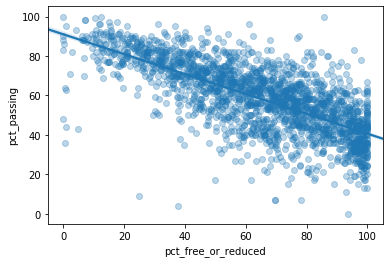

In [12]:
sns.regplot(data=df, x='pct_free_or_reduced', y='pct_passing', scatter_kws={'alpha':0.3})

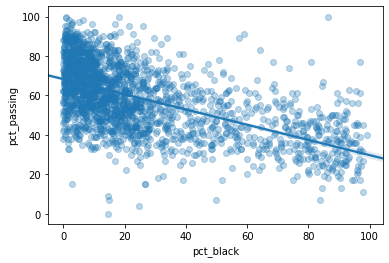

In [13]:
sns.regplot(data=df, x='pct_black', y='pct_passing', scatter_kws={'alpha':0.3})

# Linear regression

Now let's be a little more exact: run a linear regression for percent passing that takes into account both percent black and percent free or reduced.

In [18]:
import statsmodels.formula.api as smf

model = smf.ols("pct_passing ~ pct_black + pct_free_or_reduced", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pct_passing   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1398.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:58:10   Log-Likelihood:                -7963.4
No. Observations:                2070   AIC:                         1.593e+04
Df Residuals:                    2067   BIC:                         1.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              89.3659      0.707    126.460      0.000      87.980      90.752
pct_black              -0.2041      0.011    -18.669      0.000      -0.226      -0.183
pct_free_or_reduced    -0.3984      0.012    -34.271      0.000      -0.421      -0.376
==============================================================================
Omnibus:                      178.385   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              560.988
Skew:                          -0.423   Prob(JB):                    1.52e-122
Kurtosis:                       5.406   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Describe the relationship coefficient using "real" words

For example, "For every X change, we get Y change"

# Overperformers and underperformers

The point of the regression is to predict the percent passing, right? We can use `result.predict()` to get the predicted passing rate for each school. Try to run it below: 

In [ ]:
result.predict()

Now, let's **save that value into a new column**, we can call it `predicted_passing`. It won't work for schools that are missing `pct_black` or `pct_free_or_reduced`, though, so first we'll need to drop those rows.

In [26]:
df.shape

(2070, 7)

In [27]:
df = df.dropna(subset=['pct_black', 'pct_free_or_reduced'])
df.shape

(2070, 7)

In [28]:
df['predicted_passing'] = result.predict()
df.head()

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black,predicted_passing
0,01,ALACHUA,0021,CHARLES W. DUVAL ELEM SCHOOL,36.0,95.911950,90.322581,32.722663
1,01,ALACHUA,0031,J. J. FINLEY ELEMENTARY SCHOOL,74.0,54.668930,28.737542,61.722168
2,01,ALACHUA,0041,STEPHEN FOSTER ELEMENTARY SCHOOL,71.0,60.698690,38.315789,57.365169
4,01,ALACHUA,0071,LAKE FOREST ELEMENTARY SCHOOL,19.0,95.765472,84.923077,33.883060
6,01,ALACHUA,0091,LITTLEWOOD ELEMENTARY SCHOOL,56.0,59.394904,30.733229,59.432166


### Confirm that Charles W. Duval had a predicted passing rate of 32.

In [32]:
df[df['School Name'].str.contains("CHARLES")]

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black,predicted_passing
0,01,ALACHUA,0021,CHARLES W. DUVAL ELEM SCHOOL,36.0,95.911950,90.322581,32.722663
249,06,BROWARD,3221,CHARLES DREW ELEMENTARY SCHOOL,38.0,96.194825,66.998342,37.370480
349,10,CLAY,0071,CHARLES E. BENNETT ELEMENTARY SCHOO,57.0,78.465347,16.586538,54.722458
495,13,MIAMI DADE,1401,CHARLES R DREW K-8 CENTER,25.0,98.039216,91.964286,31.540153
530,13,MIAMI DADE,2331,CHARLES R HADLEY ELEM SCHOOL,66.0,84.563107,0.203459,55.637109
691,13,MIAMI DADE,5991,CHARLES DAVID WYCHE JR ELEMENTARY,46.0,89.185393,17.622378,50.240512


## Now let's find the difference between the predicted passing rate and the actual passing rate

If we're being stats-y, this is called **the residual**. Save it into a new column called.... `residual`.

You could calculate it as `df.predicted_passing - df.pct_passing` but you can also just ask for `result.resid`.

In [34]:
df['residual'] = result.resid
df.head()

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black,predicted_passing,residual
0,01,ALACHUA,0021,CHARLES W. DUVAL ELEM SCHOOL,36.0,95.911950,90.322581,32.722663,3.277337
1,01,ALACHUA,0031,J. J. FINLEY ELEMENTARY SCHOOL,74.0,54.668930,28.737542,61.722168,12.277832
2,01,ALACHUA,0041,STEPHEN FOSTER ELEMENTARY SCHOOL,71.0,60.698690,38.315789,57.365169,13.634831
4,01,ALACHUA,0071,LAKE FOREST ELEMENTARY SCHOOL,19.0,95.765472,84.923077,33.883060,-14.883060
6,01,ALACHUA,0091,LITTLEWOOD ELEMENTARY SCHOOL,56.0,59.394904,30.733229,59.432166,-3.432166


### Find the 10 schools that did much worse than predicted, based on the demographics we're looking at

* PRINCETON HOUSE CHARTER should be the worst, with PEPIN ACADEMIES below that

In [35]:
df.sort_values(by='residual').head(10)

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black,predicted_passing,residual
1410,48,ORANGE,0055,PRINCETON HOUSE CHARTER,9.0,25.000000,14.743590,76.397521,-67.397521
1073,29,HILLSBOROUGH,6609,PEPIN ACADEMIES,4.0,37.653240,24.747475,69.315062,-65.315062
2180,68,FSDB,0011,DEAF ELEMENTARY SCHOOL (FSDB),7.0,69.491525,14.782609,58.665531,-51.665531
1717,50,PALM BEACH,4037,LEARNING PATH ACADEMY,0.0,93.650794,14.569536,49.084725,-49.084725
1948,53,POLK,9203,B.E.S.T.,7.0,69.767442,50.000000,51.367702,-44.367702
420,12,COLUMBIA,0400,SHINING STAR ACADEMY OF THE ARTS,43.0,4.721030,4.950495,86.474808,-43.474808
1424,48,ORANGE,0185,RENAISSANCE CHTR SCH AT CHICKASAW,44.0,0.696056,10.146444,87.017732,-43.017732
1819,52,PINELLAS,3231,RICHARD L. SANDERS SCHOOL,17.0,50.000000,51.886792,58.857333,-41.857333
879,22,GLADES,0056,PEMAYETV EMAHAKV CHARTER OUR WAY SC,48.0,0.000000,0.581395,89.247257,-41.247257
1810,52,PINELLAS,2441,CHI CHI RODRIQUEZ ACADEMY,15.0,74.025974,26.760563,54.414434,-39.414434


### Find the top 10 schools that did better than predicted, based on the demographics we're looking at

* PARKWAY MIDDLE SCHOOL should be the best, and PATHWAYS should be second

In [38]:
df.sort_values(by='residual', ascending=False).head(10)

,District Number,District Name,School Number,School Name,pct_passing,pct_free_or_reduced,pct_black,predicted_passing,residual
165,06,BROWARD,0701,PARKWAY MIDDLE SCHOOL,100.0,85.758706,86.286788,37.591106,62.408894
304,06,BROWARD,5372,PATHWAYS ACADEMY K-8 CENTER,83.0,95.652174,64.206642,38.156444,44.843556
661,13,MIAMI DADE,5131,N DADE CENTER FOR MODERN LANGUAGE,89.0,76.767677,57.323232,47.084347,41.915653
566,13,MIAMI DADE,3101,FRANK CRAWFORD MARTIN K-8 CENTER,91.0,54.096916,59.079284,55.757254,35.242746
2187,74,FAMU LAB SCH,0351,FAMU DEVELOP RESEARCH,77.0,68.710359,96.881497,42.220239,34.779761
281,06,BROWARD,5021,SOMERSET NEIGHBORHOOD SCHOOL,77.0,73.611111,80.834915,43.543061,33.456939
1943,53,POLK,8121,HARTRIDGE ACADEMY,96.0,61.157025,9.243697,63.116233,32.883767
481,13,MIAMI DADE,1001,CORAL PARK ELEMENTARY SCHOOL,90.0,77.669903,0.688468,58.284153,31.715847
285,06,BROWARD,5031,CHARTER SCHOOL OF EXCELLENCE,77.0,74.817518,68.592058,45.561248,31.438752
677,13,MIAMI DADE,5561,FRANCES S. TUCKER ELEM. SCHOOL,75.0,93.253012,41.504854,43.745658,31.254342


# What problems might our analysis have?

We brought in two things we thought would do a good job covering socioeconomics and demographic patterns. What else might we be missing?

* **Tip:** Pay attention to the names of the schools

Is there a between using the raw number for the residual as opposed to standard deviation? (See Texas schools cheating scandal)